# Import packages and declare functions

In [17]:
# import necessary packages

# data analysis
import pandas as pd 
import numpy as np

# pseudo random generator
import random

# plotters
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

In [18]:
def addColors(df):
    """Add random colors to the DataFrame to identify nodes

    Parameters:
    df (Pandas DataFrame): Data Frame that will receive the colors

    Returns:
    df_color (Pandas DataFrame): Data Frame with random colors in hex

   """
    # attribute colors to each primary key (name)
    df_color = df.copy()
    df_color['color'] = np.random.randint(0,0xFFFFFF, size=len(df_color))
    df_color['color'] = df_color['color'].apply(lambda x: str(hex(x))[2:]).astype(str)

    return df_color


In [19]:
def meltMatrix(df):
    """Adjusts the matrix so it can fit the networkx format

    Parameters:
    df (Pandas DataFrame): Data Frame that will be melted

    Returns:
    df_melt (Pandas DataFrame): Melted Data Frame

   """
    # melts the dataframe and removes empty data
    df_melt = df.copy()
    df_melt = df_melt.melt(id_vars=['Nome','color'],value_vars=df_melt.columns)
    df_melt.columns = ['nome1','color','nome2','relacao']
    df_melt.dropna(inplace=True, how='all',axis=1)
    df_melt.dropna(inplace=True)
    df_melt.reset_index(inplace=True)
    df_melt.drop(['index'],axis=1,inplace=True)

    return df_melt

In [57]:
def plotNetwork(df, colored_edges=False, out_name='network_output'):
    """Plots the networkx network and outputs it as a high resolution PNG

    Parameters:
    df (Pandas DataFrame): Data Frame that will be evaluated. Has to be in Person1 | Person2 | Level of Connection | Color, format
    colored_edges (bool): whether or not the edges will be colored. Default: False
    out_name (string): name of the output PNG file

    Returns:
    Nothing

    """

    # copies the dataframe to avoid memory overlap
    df_plot = df.copy()

    # substitutes low level connections so distant nodes will show up
    df_plot = df_plot[df_plot['relacao']>0.5]

    # instatiates a graph
    net = nx.Graph()

    # define variables
    source = df_plot['nome1']
    destination = df_plot['nome2']
    weights = df_plot['relacao']
    colors = df_plot['color'] # colors in hex
    colors_rgb = [list(np.random.choice(range(256), size=3)/255) for i in range(len(source.unique()))] # convert colors to rgb

    # decide on parameter based on user's choice
    if colored_edges==False:
        final_color_edges = 'grey'
        final_color_names = 'black'
    else:
        final_color_names = colors_rgb
        final_color_edges = colors_rgb

    for e in zip(source,destination,weights,colors):
        # defines elements in loop
        src = e[0]
        dst = e[1]
        rel = e[2]
        color = e[3]
        
        # add nodes
        net.add_node(src)

        # add edges
        net.add_edge(src,dst)
        
    # removes last names and surnames
    translation = dict(zip(df_plot['nome1'].unique(),[item.split(' ')[0] for item in df_plot['nome1'].unique()]))

    # declares a figure
    fig, ax = plt.subplots(figsize=(15,15))

    # creates a layout based on gravitation
    positions = nx.spring_layout(net, k=1, seed=42)

    # draws the edges
    nx.draw_networkx_edges(net,
                        positions,
                        alpha=0.3,
                        edge_color=final_color_edges,
                        width=weights*1.1)
    # node_size is declared locally because for some reason when I put a variable, it changed it size to 0. Could not fix that
    nx.draw_networkx_nodes(net,positions,
                        alpha=0,
                        node_size=(df.groupby('nome1').sum()['relacao']**2).loc[list(net.nodes())])

    # draws the names and scales their sizes according to scores
    from matplotlib.pyplot import text
    for idx,(node, (x, y)) in enumerate(positions.items()):
        text(x, y, translation[node], fontsize=net.degree[node]*0.8, ha='center', va='center',color=final_color_names if colored_edges==False else final_color_names[idx])

     
    # figure details
    plt.axis('off')
    plt.savefig(out_name + '.png', dpi=300)

# Data Wrangling

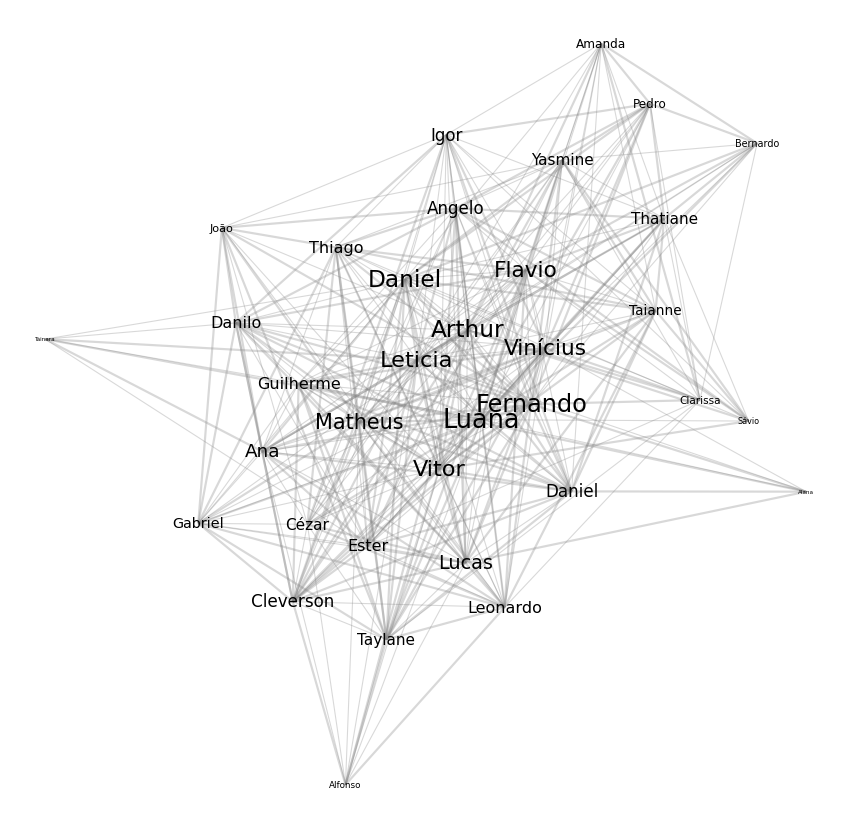

In [58]:
# wrangle for the hive team
df_hive = pd.read_excel('conexoes_hive.xlsx')
df_hive = addColors(df_hive)
df_hive = meltMatrix(df_hive)
plotNetwork(df_hive,colored_edges=False)

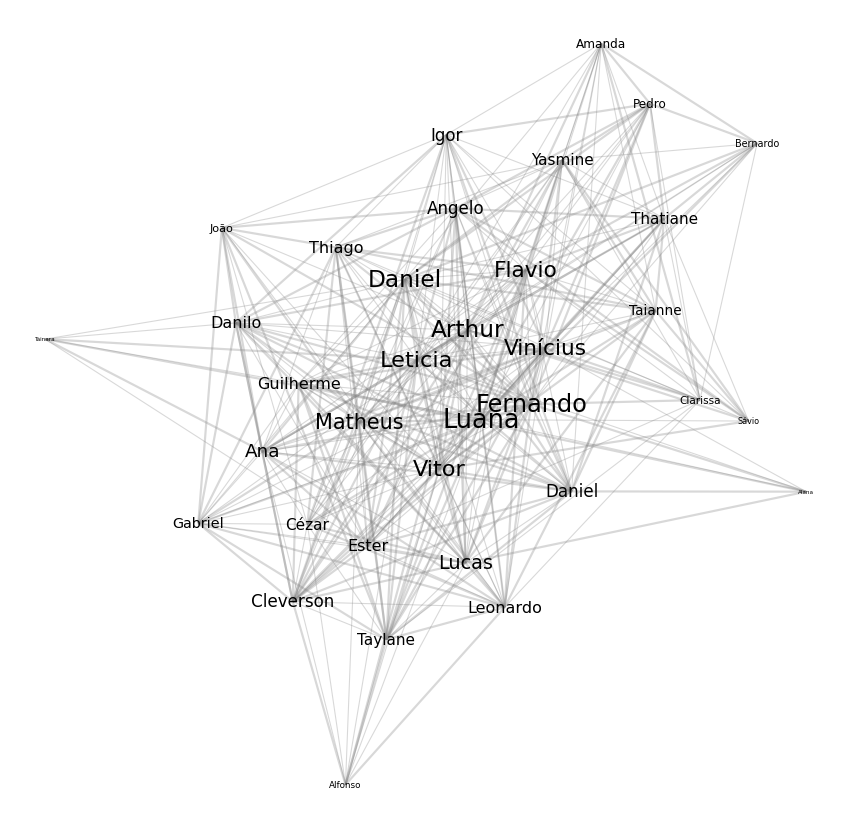

In [9]:
# substitui as conexões inexistentes para não poluir a visualização final
df_color = df_color[df_color['relacao']>0.5]

# declara o grafo
rede = nx.Graph()

# define as variáveis
fonte = df['nome1']
destino = df['nome2']
pesos = df['relacao']
cores = df['color']
cores_rgb = [list(np.random.choice(range(256), size=3)/255) for i in range(len(fonte.unique()))]

for e in zip(fonte,destino,pesos,cores):
    # define o elemento no loop
    fnt = e[0]
    dst = e[1]
    rel = e[2]
    cor = e[3]
    
    # adiciona os nós
    rede.add_node(fnt)

    # adiciona as conexões
    rede.add_edge(fnt,dst)
    
# coloca nomes mais amigáveis
traducao = dict(zip(df['nome1'].unique(),[item.split(' ')[0] for item in df['nome1'].unique()]))

# declara uma figura
fig, ax = plt.subplots(figsize=(15,15))

# desenha a rede
posicoes = nx.spring_layout(rede, k=1, seed=42)
# conexões
nx.draw_networkx_edges(rede,
                       posicoes,
                       alpha=0.3,
                       edge_color='gray',
                       width=pesos*1.1)
# nós
nx.draw_networkx_nodes(rede,posicoes,
                       alpha=0,
                       node_size=(df.groupby('nome1').sum()['relacao']**2).loc[list(rede.nodes())], 
                       # node_size is declared locally because for some reason 
                       node_color=cores_rgb)

from matplotlib.pyplot import text
for node, (x, y) in posicoes.items():
    text(x, y, traducao[node], fontsize=rede.degree[node]*0.8, ha='center', va='center',color='black')
    
# detalhes da figura
plt.axis('off')
plt.savefig('rede_hive.png', dpi=300)

In [10]:
def plota_rede(nome_arquivo,nome_figura,constante_elastica):
    df = pd.read_excel(nome_arquivo+'.xlsx')
    # atribui cores a cada um dos nomes
    df['cor'] = np.random.randint(0,0xFFFFFF, size=len(df))
    df['cor'] = df['cor'].apply(lambda x: str(hex(x))[2:]).astype(str)

    # derrete o dataframe e remove quem não respondeu
    df = df.melt(id_vars=['Nome','cor'],value_vars=df.columns)
    df.columns = ['nome1','cor','nome2','relacao']
    df.dropna(inplace=True, how='all',axis=1)
    df.dropna(inplace=True)
    df.reset_index(inplace=True)
    df.drop(['index'],axis=1,inplace=True)
    df.info()

    # substitui as conexões inexistentes para não poluir a visualização final
    df = df[df['relacao']>0.5]
    
    # declara o grafo
    rede = nx.Graph()

    # define as variáveis
    fonte = df['nome1']
    destino = df['nome2']
    pesos = df['relacao']
    cores = df['cor']
    cores_rgb = [list(np.random.choice(range(256), size=3)/255) for i in range(len(fonte.unique()))]

    for e in zip(fonte,destino,pesos,cores):
        # define o elemento no loop
        fnt = e[0]
        dst = e[1]
        rel = e[2]
        cor = e[3]

        # adiciona os nós
        rede.add_node(fnt)

        # adiciona as conexões
        rede.add_edge(fnt,dst)

    # coloca nomes mais amigáveis
    traducao = dict(zip(df['nome1'].unique(),[item.split(' ')[0] for item in df['nome1'].unique()]))

    # declara uma figura
    fig, ax = plt.subplots(figsize=(15,15))

    # desenha a rede
    posicoes = nx.spring_layout(rede, k=constante_elastica, seed=42)
    # conexões
    nx.draw_networkx_edges(rede,
                           posicoes,
                           alpha=0.3,
                           edge_color='gray',
                           width=pesos*1.1)
    # nós
    nx.draw_networkx_nodes(rede,posicoes,
                           alpha=0,
                           node_size=(df.groupby('nome1').sum()['relacao']**2).loc[list(rede.nodes())], 
                           # por algum motivo o tamanho da série se alterava quando eu usava uma variável
                           node_color=cores_rgb)

    from matplotlib.pyplot import text
    for node, (x, y) in posicoes.items():
        text(x, y, traducao[node], fontsize=rede.degree[node]*0.8, ha='center', va='center',color='black')

    # detalhes da figura
    plt.axis('off')
    plt.savefig(nome_figura+'.png', dpi=300);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nome1    1892 non-null   object 
 1   cor      1892 non-null   object 
 2   nome2    1892 non-null   object 
 3   relacao  1892 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.2+ KB


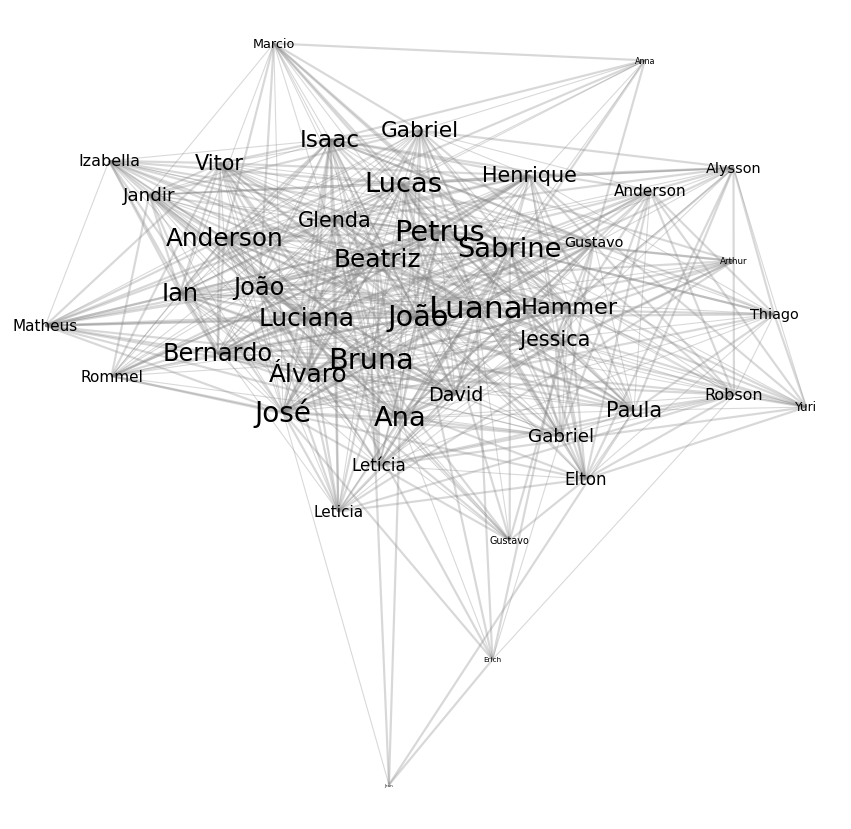

In [11]:
plota_rede('conexoes_corujas','corujas',1.2)